In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
from scipy.linalg import null_space
import math

from utils import *

%matplotlib inline

In [2]:
def simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0):#, weights_n, weights_e, weights_f):
    return omega_0-a*(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.sin(B1.dot(theta)))
#     return omega_0-a*np.diag(we).dot(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.diag(wf).dot(np.sin(B1.dot(theta))))

def integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0):#, weights_n, weights_e, weights_f):
    return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)
#     return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0, degree, weights_n, weights_e, weights_f), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

In [3]:
def ntri(A):
    # signed incidence matrices for triangles
    Nn=A.shape[0]
    Ne=int(np.sum(A)/2)
    #print Nn, Ne

    e=np.zeros((Ne,2))
    count=0;
    for i in range(Nn):
        for j in range(i+1,Nn):
            if(A[i,j]>0):
                e[count,0]=i
                e[count,1]=j
                count+=1
#     print "edges"
#     print e
    I=np.zeros((Ne,Nn))
    for i in range(Ne):
        I[i,int(e[i,0])]=1
        I[i,int(e[i,1])]=-1
    #print I

    Nf=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    Nf+=1
    f=np.zeros((Nf,3))
    count=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    f[count,0]=i
                    f[count,1]=j
                    f[count,2]=k
                    count+=1
#     print "faces"
#     print f
    II=np.zeros((Nf,Ne))
    for i in range(f.shape[0]):
        for j in [0,-1,-2]:
            temp=np.roll(f[i,:],j)
            temp=temp[0:2]
            for k in range(e.shape[0]):
                #print e[k,:],temp
                if(((e[k,:]==temp).all())or((e[k,:]==np.roll(temp,1)).all())):
                    Irow=k
            if(temp[0]<temp[1]):
                II[i,Irow]=1
            else:
                II[i,Irow]=-1
    #print II 
    ntrie=np.sum(II,1)
    return I,II#,ntrie, e#, len(ntrie)

In [4]:
def plotflow(theta_0,B0,B1,plotname,t_max=110,n_t=200):
    print(plotname)
    omega_0=np.ones(B0.shape[0])*0
    degree=np.absolute(B0).sum(0)
    a=1
#     t_max = 110 #integration time
#     n_t = 200 #number of timepoints 

    result=integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0)
    times = result.t
    theta = result.y
    
    plt.figure()
    plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
    plt.title(plotname+' phases')
    plt.colorbar()
    
    op=order_parameter(theta, 4, 1)
    plt.figure()
    plt.title(plotname+' order parameter')
    plt.plot(op[0,:])

    print('\theta_0: ', theta_0)
    print('\theta_final: ',theta[:,-1])
    
    Div=np.mod(np.around(B0.T.dot(theta),10),np.around(2*np.pi,10))
    Curl=np.mod(np.around(B1.dot(theta),10),np.around(2*np.pi,10))
    print('Div: (must be zeros for solutions)', Div[:,-1])
    print('Curl: ', Curl[:,-1])
    
    L1=-B0.dot(B0.T)-B1.T.dot(B1)
    print('L1\theta must be zero, second one row is modulo 2pi')
    print('L1\theta: ', L1.dot(theta[:,-1]))
    print('L1\theta:', np.mod(np.around(L1.dot(theta[:,-1]),10),np.around(2*np.pi,10)))
    print('dim(Ker(L1)): ', null_space(L1).shape[1])
    print('Ker(L1): ', null_space(L1))
    
#     plt.figure()
#     plt.imshow(Div, aspect='auto',cmap='bwr')
#     plt.title(plotname+' divergence')
#     plt.colorbar()
#     plt.figure()
#     plt.imshow(Curl, aspect='auto',cmap='bwr')
#     plt.title(plotname+' curl')
#     plt.colorbar()
    return theta[:,-1]

[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.]]
One opposite orientation
('\theta_0: ', array([5.61891383, 1.41797896, 3.84232665, 3.75441072, 6.1806867 ,
       1.33301908, 3.26297019, 1.88135246, 3.0703195 , 3.41369497]))
('\theta_final: ', array([4.66476784, 2.246736  , 5.29308637, 5.9214049 , 6.54972343,
       0.89485666, 1.52317519, 2.15149372, 2.77981225, 3.40813078]))
('Div: (must be zeros for solutions)', array([0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
       0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853]))
('Curl: ', array([], dtype=float64))
L1	heta must be zero, seco

array([7.14747849, 0.86429318, 7.14747849, 7.14747849, 7.14747849,
       0.86429318, 0.86429318, 0.86429318, 0.86429318, 0.86429318])

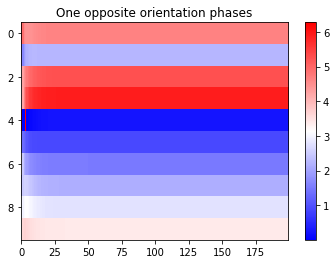

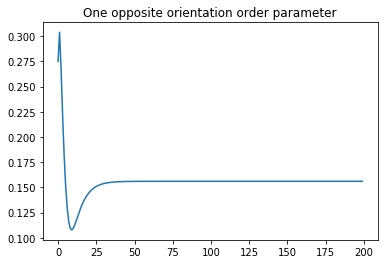

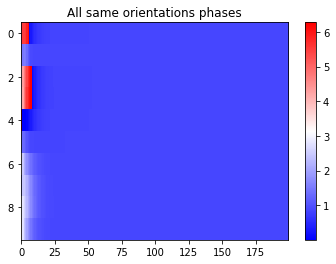

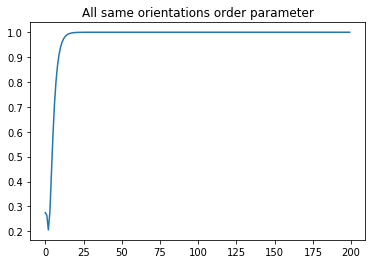

In [5]:
# cycle graph, so no faces, simplest case
Nn=10 # the transient with large Nn is fun to watch

G=nx.cycle_graph(Nn)

A=nx.to_numpy_matrix(G)

B0,B1=ntri(A) # only B0 is non trivial, as no faces

print(B0)
# with the current orientation, there is a clash on node 0

Nn=B0.shape[1]
Ne=B0.shape[0]
Nf=B1.shape[0]

# inital conditions
# np.random.seed(seed=4444)
theta_0=2*np.pi*np.random.rand(Ne)
# theta_0=(np.random.rand(Ne)-0.5)*10

theta_final=plotflow(theta_0,B0,B1,'One opposite orientation',110,200)

# reverse the orientation of the odd one out
B0[1,0]=-B0[1,0]
B0[1,-1]=-B0[1,-1]

plotflow(theta_0,B0,B1,'All same orientations',110,200)
# plotflow(theta_final,B0,B1,'All same orientations') #to check that the stationary state with the odd one out is unstable for the all the same

# So here we see that the stationary state is directly proportional to the eigenvector in the null-space of the Laplacian
# With one "off-phase" oscillator

In [6]:
# Edge Kuramoto with only the first term, but the lift associated matrices, see next cell for definitions
# The problem is probably in this equation
def simplicial_kuramoto_full_theta_double(t, theta, B0d, B0dp, B0dm, B1d, B1dp, B1dm, a, omega_0):

    return omega_0-a*(B0d.dot(np.sin(B0d.T.dot(theta))))

def integrate_simplicial_kuramoto_full_theta_double(B0d, B0dp ,B0dm, B1d, B1dp, B1dm, theta_0, t_max, n_t, a, omega_0):
    
    return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta_double(t, theta, B0d, B0dp ,B0dm, B1d, B1dp, B1dm, a, omega_0), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

('\theta_0: ', array([ 0.38047847, -0.38047847,  0.38047847,  0.38047847,  0.38047847,
        3.52207113,  3.52207113,  3.52207113,  0.38047847,  0.38047847,
       -0.38047847,  0.38047847, -0.38047847, -0.38047847, -0.38047847,
       -3.52207113, -3.52207113, -3.52207113, -0.38047847, -0.38047847]))
('\theta_final: ', array([ 0.38047847, -0.38047847,  0.38047847,  0.38047847,  0.38047847,
        3.52207113,  3.52207113,  3.52207113,  0.38047847,  0.38047847,
       -0.38047847,  0.38047847, -0.38047847, -0.38047847, -0.38047847,
       -3.52207113, -3.52207113, -3.52207113, -0.38047847, -0.38047847]))
('\theta_final: ', array([0.38047847, 5.90270684, 0.38047847, 0.38047847, 0.38047847,
       3.52207113, 3.52207113, 3.52207113, 0.38047847, 0.38047847,
       5.90270684, 0.38047847, 5.90270684, 5.90270684, 5.90270684,
       2.76111418, 2.76111418, 2.76111418, 5.90270684, 5.90270684]))
Unlifted quantities
('\theta_0: ', array([ 0.76095694, -0.76095694,  0.76095694,  0.76095694,  0.

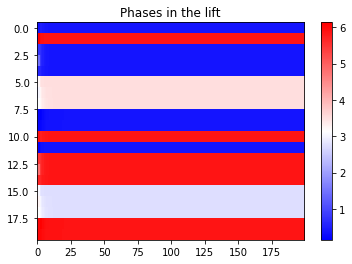

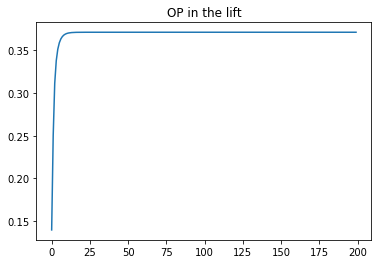

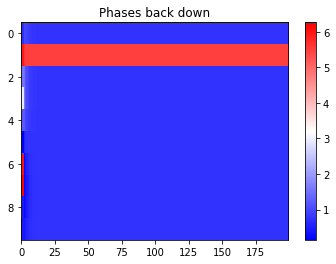

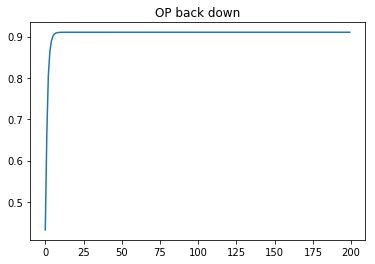

In [7]:
# Now let's do the same with the lift to try to make all this orientation independent
Nn=10
G=nx.cycle_graph(Nn)

A=nx.to_numpy_matrix(G)

B0,B1=ntri(A)

# B0[1,0]=-B0[1,0]
# B0[1,-1]=-B0[1,-1]

Ne=B0.shape[0]
Nf=B1.shape[0]

# lift matrix
V=np.concatenate((np.eye(Ne),-np.eye(Ne)),axis=0)
# lifted B0 and B1
B0d=V.dot(B0)
B1d=B1.dot(V.T)
# plus and minuses Bs
B0dp=(np.abs(B0d)+B0d)/2
B0dm=(np.abs(B0d)-B0d)/2
B1dp=(np.abs(B1d)+B1d)/2
B1dm=(np.abs(B1d)-B1d)/2


# initial conditions
# np.random.seed(seed=4444)
theta_0=np.pi*np.random.rand(Ne)
# theta_0=(np.random.rand(Ne)-0.5)*1
theta_0d=V.dot(theta_0)
omega_0=np.ones(2*Ne)*0

a=1

t_max = 110 #integration time
n_t = 200 #number of timepoints 

result=integrate_simplicial_kuramoto_full_theta_double(B0d, B0dp ,B0dm, B1d, B1dp, B1dm, theta_0d, t_max, n_t, a, omega_0)

times = result.t
theta = result.y
# theta=V.T.dot(theta)

plt.figure()
plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
plt.title('Phases in the lift')
plt.colorbar()

op=order_parameter(theta, 4, 1)
plt.figure()
plt.title('OP in the lift')
plt.plot(op[0,:])

print('\theta_0: ',theta[:,-1])
print('\theta_final: ', theta[:,-1])
print('\theta_final: ', np.mod(np.around(theta[:,-1],10),np.around(2*np.pi,10)))


print('Unlifted quantities')
theta=V.T.dot(theta) # no we bring the final state back down
Div=np.mod(np.around(B0.T.dot(theta),10),np.around(2*np.pi,10))
Curl=np.mod(np.around(B1.dot(theta),10),np.around(2*np.pi,10))

plt.figure()
plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
plt.title('Phases back down')
plt.colorbar()

op=order_parameter(theta, 4, 1)
plt.figure()
plt.title('OP back down')
plt.plot(op[0,:])

print('\theta_0: ',theta[:,-1])
print('\theta_final: ', theta[:,-1])
print('\theta_final: ', np.mod(np.around(theta[:,-1],10),np.around(2*np.pi,10)))

print('Div: ', Div[:,-1])
print('Curl: ', Curl[:,-1])

L1=-B0.dot(B0.T)-B1.T.dot(B1)
print('L1\theta must be zero, second one row is modulo 2pi')
print('L1\theta: ', L1.dot(theta[:,-1]))
print('L1\theta: ', np.mod(np.around(L1.dot(theta[:,-1]),10),np.around(2*np.pi,10)))
print('dim(Ker(L1)): ', null_space(L1).shape[1])
print('Ker(L1): ', null_space(L1))

# plt.figure()
# plt.imshow(Div, aspect='auto',cmap='bwr')
# plt.colorbar()
# plt.figure()
# plt.imshow(Curl, aspect='auto',cmap='bwr')
# plt.colorbar() 